In [3]:
import pandas as pd
import matplotlib.pyplot  as plt
import sktl_class

In [4]:
sittingDf = pd.read_json("IMG_2438_feature_df.json")
sittingDf


,image,text,label,bbox,idNo,LEar,LEye,LHip,LShoulder,Neck,Nose,REye,RShoulder,RHip,LKnee
0,ceiling_6.png,"[[[740, 570, 1072, 746], a\n], [[858, 596, 106...",ceiling,[-1],-1.0,None,None,None,None,None,None,None,None,None,None
1,curtain_3.png,[],curtain,[-1],-1.0,None,None,None,None,None,None,None,None,None,None
2,door-stuff_4.png,[],door-stuff,[-1],-1.0,None,None,None,None,None,None,None,None,None,None
3,floor_8.png,[],floor,[-1],-1.0,None,None,None,None,None,None,None,None,None,None
4,person_1.png,[],person,"[900, 2325, 2871, 5452]",1.0,None,None,"{'x': 661.2118902439, 'y': 1521.1304347826}",None,"{'x': 582.8460365854, 'y': 1660.8260869565}",None,None,"{'x': 671.0076219512, 'y': 1785.0}","{'x': 622.0289634146, 'y': 1862.6086956522}","{'x': 768.9649390244, 'y': 1443.5217391304}"
5,refrigerator_2.png,[],refrigerator,"[12, 3455, 638, 5473]",0.0,None,None,None,None,None,None,None,None,None,None
6,rug_10.png,[],rug,[-1],-1.0,None,None,None,None,None,None,None,None,None,None
7,table_7.png,[],table,[-1],-1.0,None,None,None,None,None,None,None,None,None,None
8,towel_5.png,[],towel,[-1],-1.0,None,None,None,None,None,None,None,None,None,None
9,wall_9.png,[],wall,[-1],-1.0,None,None,None,None,None,None,None,None,None,None


In [5]:
sittingDf.iloc[4]

image                                       person_1.png
text                                                  []
label                                             person
bbox                             [900, 2325, 2871, 5452]
idNo                                                 1.0
LEar                                                None
LEye                                                None
LHip         {'x': 661.2118902439, 'y': 1521.1304347826}
LShoulder                                           None
Neck         {'x': 582.8460365854, 'y': 1660.8260869565}
Nose                                                None
REye                                                None
RShoulder             {'x': 671.0076219512, 'y': 1785.0}
RHip         {'x': 622.0289634146, 'y': 1862.6086956522}
LKnee        {'x': 768.9649390244, 'y': 1443.5217391304}
Name: 4, dtype: object

In [6]:
sittingDf.iloc[-1]

image                                       IMG_2438.JPEG
text                                                 None
label                                                None
bbox                                                 None
idNo                                                  NaN
LEar          {'x': 862.0243902439, 'y': 3057.7826086957}
LEye         {'x': 1097.1219512195, 'y': 3119.8695652174}
LHip          {'x': 862.0243902439, 'y': 1707.3913043478}
LShoulder     {'x': 930.5945121951, 'y': 2685.2608695652}
Neck          {'x': 754.2713414634, 'y': 2654.2173913043}
Nose         {'x': 1146.1006097561, 'y': 3057.7826086957}
REye         {'x': 1141.2027439024, 'y': 3135.3913043478}
RShoulder     {'x': 543.6631097561, 'y': 2669.7391304348}
RHip                                                 None
LKnee                                                None
Name: 10, dtype: object

#### Grabing RHIP and Knee from person png to create a connected skeleton (reason as to why this would be potenially shite)

In [7]:
sittingFullRow = sittingDf.iloc[-1]
sittingFullRow[-1] = sittingDf.iloc[4][-1]
sittingFullRow[-2] = sittingDf.iloc[4][-2]
sittingKeypoints=sittingFullRow[5:]
print(sittingKeypoints)


LEar          {'x': 862.0243902439, 'y': 3057.7826086957}
LEye         {'x': 1097.1219512195, 'y': 3119.8695652174}
LHip          {'x': 862.0243902439, 'y': 1707.3913043478}
LShoulder     {'x': 930.5945121951, 'y': 2685.2608695652}
Neck          {'x': 754.2713414634, 'y': 2654.2173913043}
Nose         {'x': 1146.1006097561, 'y': 3057.7826086957}
REye         {'x': 1141.2027439024, 'y': 3135.3913043478}
RShoulder     {'x': 543.6631097561, 'y': 2669.7391304348}
RHip          {'x': 622.0289634146, 'y': 1862.6086956522}
LKnee         {'x': 768.9649390244, 'y': 1443.5217391304}
Name: 10, dtype: object


c:\Users\Ossia\anaconda3\envs\SCCUIF\lib\site-packages\pandas\core\series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


In [8]:
standinggDf = pd.read_json("IMG_2439_feature_df.json")
standinggDf

,image,text,label,bbox,idNo,LEar,LEye,Neck,Nose,RElbow,REye,RHip,RShoulder,RWrist,LHip,LKnee,LAnkle
0,bed_2.png,[],bed,"[1998, 3343, 3193, 5436]",3.0,None,None,None,None,None,None,None,None,None,None,None,None
1,ceiling_6.png,"[[[3061, 479, 3213, 691], wi\n], [[490, 506, 6...",ceiling,[-1],-1.0,None,None,None,None,None,None,None,None,None,None,None,None
2,door-stuff_5.png,"[[[1017, 3638, 1389, 3974], *\n], [[1114, 3763...",door-stuff,[-1],-1.0,None,None,None,None,None,None,None,None,None,None,None,None
3,floor_8.png,[],floor,[-1],-1.0,None,None,None,None,None,None,None,None,None,None,None,None
4,person_1.png,"[[[1203, 2409, 1311, 3921], ,\n], [[1722, 2458...",person,"[1094, 1338, 2138, 5347]",2.0,None,None,"{'x': 1371.4024390244, 'y': 2856.0}",None,None,None,"{'x': 1567.3170731707, 'y': 2809.4347826087}",None,None,"{'x': 1488.9512195122, 'y': 2467.9565217391}","{'x': 1528.1341463415, 'y': 2157.5217391304}","{'x': 1542.8277439024, 'y': 1862.6086956522}"
5,refrigerator_3.png,[],refrigerator,"[7, 3510, 608, 5439]",0.0,None,None,None,None,None,None,None,None,None,None,None,None
6,rug_10.png,[],rug,[-1],-1.0,None,None,None,None,None,None,None,None,None,None,None,None
7,table_7.png,[],table,[-1],-1.0,None,None,None,None,None,None,None,None,None,None,None,None
8,tie_4.png,[],tie,"[304, 2094, 835, 3835]",1.0,None,None,None,None,None,None,None,None,None,None,None,None
9,wall_9.png,"[[[1939, 1990, 2031, 2366], r\n]]",wall,[-1],-1.0,None,None,None,None,None,None,None,None,None,None,None,None


#### Applying same copy from sitting in standing

In [9]:
standingFullRow = standinggDf.iloc[-1]
standingFullRow[-1] = standinggDf.iloc[4][-1]
standingFullRow[-2] = standinggDf.iloc[4][-2]
standingFullRow[-3] = standinggDf.iloc[4][-3]
standingKeyPoints= standingFullRow[5:]
print(standingKeyPoints)


LEar         {'x': 1655.4786585366, 'y': 4097.7391304348}
LEye         {'x': 1861.1890243902, 'y': 4128.7826086957}
Neck         {'x': 1670.1722560976, 'y': 3647.6086956522}
Nose         {'x': 1895.4740853659, 'y': 4082.2173913043}
RElbow       {'x': 1924.8612804878, 'y': 3011.2173913043}
REye         {'x': 1895.4740853659, 'y': 4128.7826086957}
RHip         {'x': 1875.8826219512, 'y': 2359.3043478261}
RShoulder    {'x': 1900.3719512195, 'y': 3492.3913043478}
RWrist        {'x': 2027.7164634146, 'y': 2607.652173913}
LHip         {'x': 1488.9512195122, 'y': 2467.9565217391}
LKnee        {'x': 1528.1341463415, 'y': 2157.5217391304}
LAnkle       {'x': 1542.8277439024, 'y': 1862.6086956522}
Name: 10, dtype: object


c:\Users\Ossia\anaconda3\envs\SCCUIF\lib\site-packages\pandas\core\series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


In [10]:
print(standingKeyPoints.to_dict())

{'LEar': {'x': 1655.4786585366, 'y': 4097.7391304348}, 'LEye': {'x': 1861.1890243902, 'y': 4128.7826086957}, 'Neck': {'x': 1670.1722560976, 'y': 3647.6086956522}, 'Nose': {'x': 1895.4740853659, 'y': 4082.2173913043}, 'RElbow': {'x': 1924.8612804878, 'y': 3011.2173913043}, 'REye': {'x': 1895.4740853659, 'y': 4128.7826086957}, 'RHip': {'x': 1875.8826219512, 'y': 2359.3043478261}, 'RShoulder': {'x': 1900.3719512195, 'y': 3492.3913043478}, 'RWrist': {'x': 2027.7164634146, 'y': 2607.652173913}, 'LHip': {'x': 1488.9512195122, 'y': 2467.9565217391}, 'LKnee': {'x': 1528.1341463415, 'y': 2157.5217391304}, 'LAnkle': {'x': 1542.8277439024, 'y': 1862.6086956522}}


#### Creating connecion list for full skelton based on common coco points list plus the openpos

In [11]:
# https://github.com/ildoonet/tf-pose-estimation/blob/master/tf_pose/common.py#L13
    # Nose = 0
    # Neck = 1
    # RShoulder = 2
    # RElbow = 3
    # RWrist = 4
    # LShoulder = 5
    # LElbow = 6
    # LWrist = 7
    # RHip = 8
    # RKnee = 9
    # RAnkle = 10
    # LHip = 11
    # LKnee = 12
    # LAnkle = 13
    # REye = 14
    # LEye = 15
    # REar = 16
    # LEar = 17
    # (1, 2),
    # (1, 5),
    # (2, 3),
    # (3, 4),
    # (5, 6),
    # (6, 7),
    # (1, 8),
    # (8, 9),
    # (9, 10),
    # (1, 11),
    # (11, 12),
    # (12, 13),
    # (1, 0),
    # (0, 14),
    # (14, 16),
    # (0, 15),
    # (15, 17),
    # (2, 16),
    # (5, 17),

# ## Test 1
# def display_skeleton(keyPointDict):
#     skeletonConnections = [
#         ("Neck", "RShoulder"),
#         ("Neck", "LShoulder"),
#         ("RShoulder", "RElbow"),
#         ("RElbow", "RWrist"),
#         ("LShoulder", "LElbow"),
#         ("LElbow", "LWrist"),
#         ("Neck", "RHip"),
#         ("RHip", "RKnee"),
#         ("RKnee", "RAnkle"),
#         ("Neck", "LHip"),
#         ("LHip", "LKnee"),
#         ("LKnee", "LAnkle"),
#         ("Neck", "Nose"),
#         ("Nose", "REye"),
#         ("REye", "REar"),
#         ("Nose", "LEye"),
#         ("LEye", "LEar"),
#         ("RShoulder", "REar"),
#         ("LShoulder", "LEar")
#     ]

## Test 2
def display_skeleton(keyPointDict):
    skeletonConnections = [
        #Head
        ("Neck", "Nose"),
        ("Nose", "REye"),
        ("REye", "REar"),
        ("Nose", "LEye"),
        ("LEye", "LEar"),
        #Right Upper
        ("Neck", "RShoulder"),
        ("RShoulder", "RElbow"),
        ("RElbow", "RWrist"),
        ("RShoulder", "RHip"),

        #Left Upper
        ("Neck", "LShoulder"),
        ("LShoulder", "LElbow"),
        ("LElbow", "LWrist"),
        ("LShoulder", "LHip"),

        #Uppers
        ("RShoulder", "LShoulder"),
        ("RHip", "LHip"),

        #Left Lower
        ("LHip", "LKnee"),
        ("LKnee", "LAnkle"),

        #Right Lower
        ("RHip", "RKnee"),
        ("RKnee", "RAnkle"),
        
    
        
    ]


    #Plotting
    plt.figure(figsize=(6, 8))

    # Plot points
    for part, info in keyPointDict.items():
        plt.plot(info['x'], info['y'], 'o', label=part)  # Plot each body part as a point

    # Draw lines for the skeleton
    for connection in skeletonConnections:
        if connection[0] in keyPointDict and connection[1] in keyPointDict:
            start_point = keyPointDict[connection[0]]
            end_point = keyPointDict[connection[1]]
            plt.plot([start_point['x'], end_point['x']], [start_point['y'], end_point['y']], 'k-')  # 'k-' denotes a black line


    plt.xlabel('X')
    plt.ylabel('Y')
    plt.xlim([0, 3213])  
    plt.ylim([0, 5712])  
    plt.legend()
    plt.show()



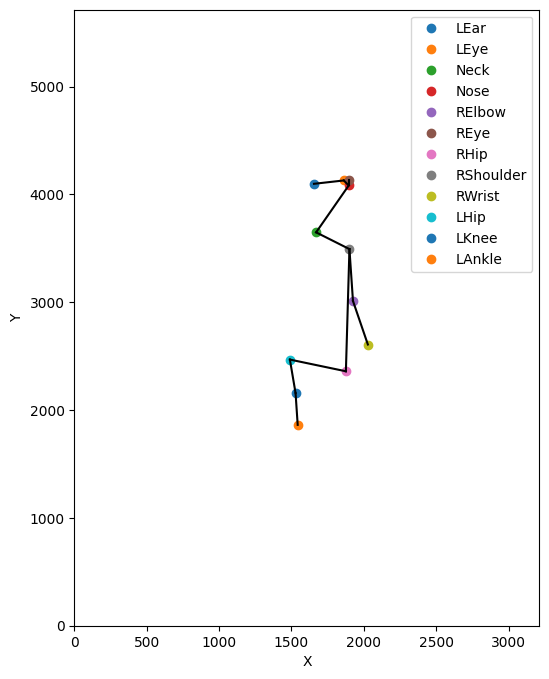

In [12]:
display_skeleton(standingKeyPoints.to_dict())

In [13]:
temp = sittingDf.iloc[-1]
temp


image                                       IMG_2438.JPEG
text                                                 None
label                                                None
bbox                                                 None
idNo                                                  NaN
LEar          {'x': 862.0243902439, 'y': 3057.7826086957}
LEye         {'x': 1097.1219512195, 'y': 3119.8695652174}
LHip          {'x': 862.0243902439, 'y': 1707.3913043478}
LShoulder     {'x': 930.5945121951, 'y': 2685.2608695652}
Neck          {'x': 754.2713414634, 'y': 2654.2173913043}
Nose         {'x': 1146.1006097561, 'y': 3057.7826086957}
REye         {'x': 1141.2027439024, 'y': 3135.3913043478}
RShoulder     {'x': 543.6631097561, 'y': 2669.7391304348}
RHip                                                 None
LKnee                                                None
Name: 10, dtype: object

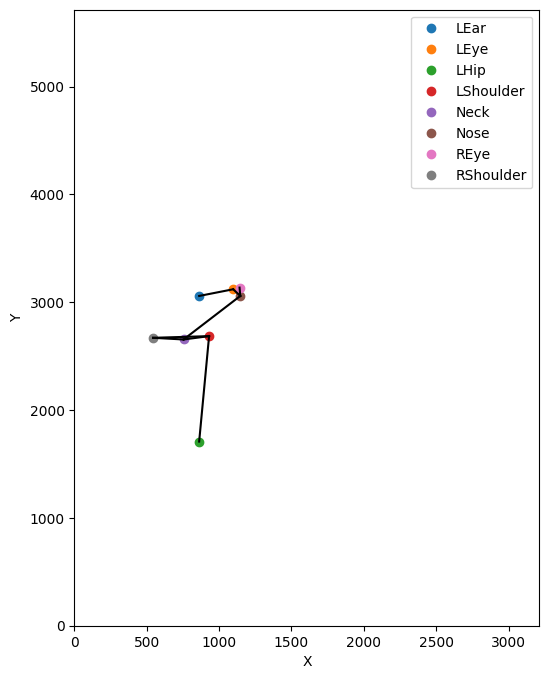

In [14]:
display_skeleton(temp[5:-2].to_dict())

# Upper vs lower



In [15]:


standingSktl = sktl_class.Skeleton({"image": "standingImage", "skeltal_data": {"body_parts":  standinggDf.iloc[-1, 5:].to_dict()}})
sitingSktl = sktl_class.Skeleton({"image": "sitingImage", "skeltal_data": {"body_parts":  sittingDf.iloc[-1, 5:].to_dict()}})

standingSktl.get_stand_sit()


No Usable lowerbody


In [16]:
sitingSktl.get_stand_sit()

No Usable lowerbody


## MuLTI PERSON 


In [17]:
img2288Df = pd.read_json("IMG_2288_feature_df.json")
img2288Df

,image,text,label,bbox,idNo,LEar,LElbow,LHip,LShoulder,LWrist,Neck,REar,RElbow,RHip,RShoulder
0,building_29.png,"[[[0, 338, 227, 2126], :\n], [[811, 531, 1151,...",building,[-1],-1.0,None,None,None,None,None,None,None,None,None,None
1,bus_1.png,"[[[2144, 2166, 2448, 2254], ~~\n], [[2127, 239...",bus,"[2108, 2011, 2731, 2467]",15.0,None,None,None,None,None,None,None,None,None,None
2,bus_12.png,[],bus,"[3831, 2151, 4033, 2407]",17.0,None,None,None,None,None,None,None,None,None,None
3,fence_26.png,[],fence,[-1],-1.0,None,None,None,None,None,None,None,None,None,None
4,pavement_28.png,"[[[1478, 2412, 2306, 2548], ee\n], [[1261, 243...",pavement,[-1],-1.0,None,None,None,None,None,None,None,None,None,None
5,person_10.png,[],person,"[1086, 2292, 1155, 2504]",4.0,None,None,None,None,None,None,None,None,None,None
6,person_11.png,[],person,"[1775, 2276, 1829, 2425]",9.0,None,None,None,None,None,None,None,None,None,None
7,person_13.png,[],person,"[1839, 2285, 1880, 2441]",10.0,None,None,None,None,None,None,None,None,None,None
8,person_14.png,[],person,"[333, 2348, 450, 2587]",0.0,None,None,None,None,None,None,None,None,None,None
9,person_15.png,[],person,"[1897, 2298, 1946, 2445]",11.0,None,None,None,None,None,None,None,None,None,None


In [18]:
imageFullRow = img2288Df.iloc[-1]
imageSktl = imageFullRow[5:]
imageSktlPts = imageSktl.to_dict()
imageSktlPts

{'LEar': {'x': 2612.1951219512, 'y': 768.3260869565},
 'LElbow': {'x': 2821.1707317073, 'y': 227.0054347826},
 'LHip': {'x': 2716.6829268293, 'y': 122.2336956522},
 'LShoulder': {'x': 2734.0975609756, 'y': 576.2445652174},
 'LWrist': {'x': 2803.756097561, 'y': 157.1576086957},
 'Neck': {'x': 2559.9512195122, 'y': 558.7826086957},
 'REar': {'x': 2455.4634146341, 'y': 750.8641304348},
 'RElbow': {'x': 2298.7317073171, 'y': 209.5434782609},
 'RHip': {'x': 2507.7073170732, 'y': 139.6956521739},
 'RShoulder': {'x': 2368.3902439024, 'y': 541.3206521739}}

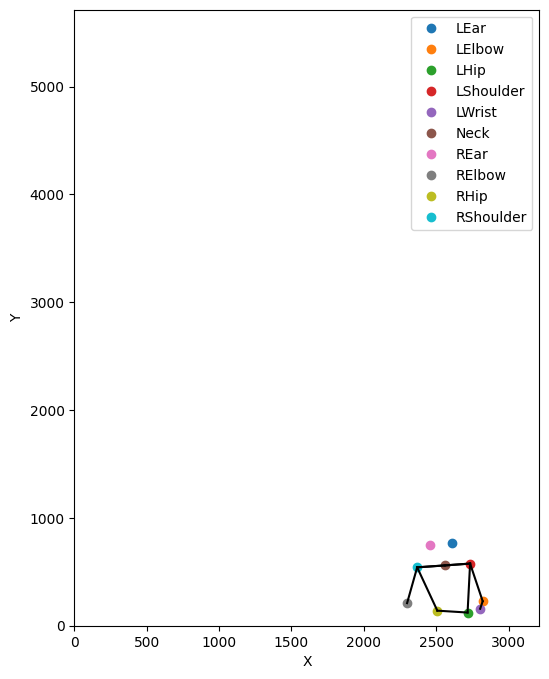

In [19]:
display_skeleton(imageSktlPts)

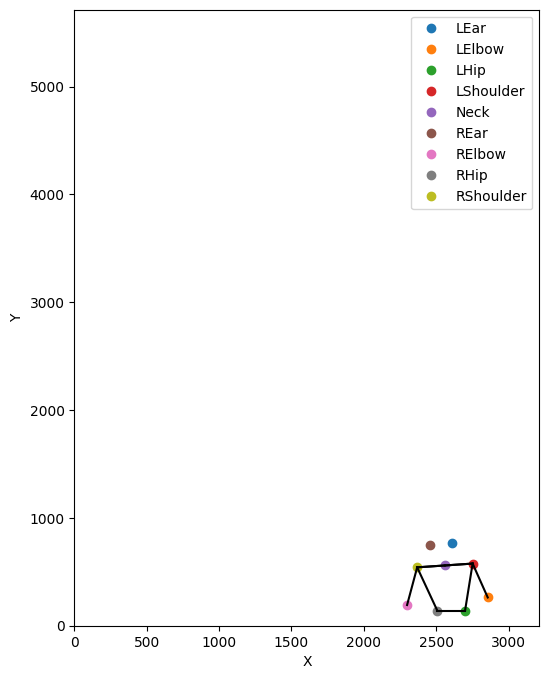

In [20]:
person_2FullRow = img2288Df.iloc[14]
person_2Sktl = person_2FullRow[5:]
person_2SktlPts = person_2Sktl.to_dict()
person_2SktlPts.pop("LWrist")
person_2SktlPts
display_skeleton(person_2SktlPts)

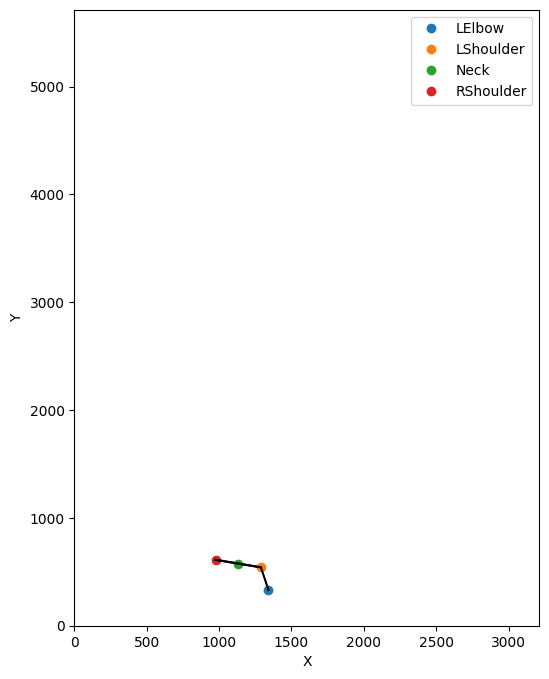

In [21]:
	
person_4FullRow = img2288Df.iloc[19]
person_4Sktl = person_4FullRow[5:]
person_4SktlPts = person_4Sktl.to_dict()
person_4SktlPts.pop("LEar")
person_4SktlPts.pop("LHip")
person_4SktlPts.pop("LWrist")
person_4SktlPts.pop("REar")
person_4SktlPts.pop("RElbow")
person_4SktlPts.pop("RHip")
person_4SktlPts
display_skeleton(person_4SktlPts)

In [22]:
person_3ImgPath = 'person_3.png'

img6533Df = pd.read_json('IMG_6533_feature_df.json')
img6533Df 

,image,text,label,bbox,idNo,LAnkle,LEar,LElbow,LEye,LHip,...,Neck,Nose,RAnkle,REar,RElbow,REye,RHip,RKnee,RShoulder,RWrist
0,bicycle_12.png,"[[[953, 866, 1133, 914], i ’\n]]",bicycle,"[987, 872, 1044, 907]",4.0,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,building_19.png,"[[[1825, 229, 1885, 417], ], [[382, 312, 550, ...",building,[-1],-1.0,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,chair_7.png,[],chair,"[1551, 1020, 1637, 1165]",10.0,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,chair_9.png,[],chair,"[1494, 972, 1542, 1115]",9.0,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,door-stuff_13.png,[],door-stuff,[-1],-1.0,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5,fence_16.png,[],fence,[-1],-1.0,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
6,handbag_8.png,[],handbag,"[873, 972, 897, 1038]",3.0,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
7,pavement_18.png,"[[[646, 1014, 802, 1050], _— -\n], [[368, 1189...",pavement,[-1],-1.0,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8,person_1.png,[],person,"[811, 848, 893, 1077]",2.0,"{'x': 845.8348623853, 'y': 1055.3260869565}",None,None,None,"{'x': 853.0642201835, 'y': 954.1304347826}",...,"{'x': 860.2935779817, 'y': 881.847826087}","{'x': 867.5229357798, 'y': 860.1630434783}","{'x': 853.0642201835, 'y': 1048.097826087}",None,None,None,"{'x': 845.8348623853, 'y': 954.1304347826}","{'x': 853.0642201835, 'y': 1004.7282608696}",None,None
9,person_11.png,[],person,"[1048, 847, 1064, 891]",5.0,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [23]:
person_3_sktl=sktl_class.Skeleton({"image": "person_3.png", "skeltal_data": {"body_parts":  img6533Df.iloc[10, 5:].to_dict()}})
person_3_sktl.get_lower_cloth()

(1416.9541284404, 1055.3260869565, 1438.6422018349, 1257.7173913043)


In [24]:
person_3_sktl.get_stand_sit()

True

In [25]:
import os
os.getcwd()

'c:\\Users\\Ossia\\Documents\\SCCUIF\\scripts\\LabExamples'

In [52]:
img6544df = pd.read_json("../../notebooks/IMG_6544_feature_df.json")
img6544df

,index,image,text,label,bbox,idNo,LElbow,LEye,LHip,LShoulder,Neck,Nose,REar,RElbow,REye,RHip,RShoulder
0,0,building_23.png,"[[[405, 67, 717, 143], ], [[300, 201, 840, 365...",building,[-1],-1.0,None,None,None,None,None,None,None,None,None,None,None
1,20,road_20.png,"[[[1043, 1301, 1243, 1330], ~ ll\n]]",road,[-1],-1.0,None,None,None,None,None,None,None,None,None,None,None
2,21,sky_21.png,[],sky,[-1],-1.0,None,None,None,None,None,None,None,None,None,None,None
3,9,pavement_22.png,"[[[2159, 1085, 2271, 1141], an\n], [[2195, 115...",pavement,[-1],-1.0,None,None,None,None,None,None,None,None,None,None,None
4,7,car_6.png,[],car,"[17, 907, 570, 1124]",0.0,None,None,None,None,None,None,None,None,None,None,None
5,17,person_5.png,[],person,"[641, 905, 670, 1008]",1.0,None,None,None,None,None,None,None,None,None,None,None
6,1,bus_1.png,"[[[816, 800, 952, 836], ata q\n]]",bus,"[776, 694, 1202, 1018]",2.0,None,None,None,None,None,None,None,None,None,None,None
7,10,person_10.png,[],person,"[1241, 868, 1268, 936]",3.0,None,None,None,None,None,None,None,None,None,None,None
8,13,person_14.png,[],person,"[1289, 885, 1308, 933]",4.0,None,None,None,None,None,None,None,None,None,None,None
9,15,person_19.png,[],person,"[1313, 875, 1327, 930]",5.0,None,None,None,None,None,None,None,None,None,None,None


In [53]:
imgAdf = pd.read_json("../../notebooks/IMG_6544_feature_df.json")
imgAdf

,index,image,text,label,bbox,idNo,LElbow,LEye,LHip,LShoulder,Neck,Nose,REar,RElbow,REye,RHip,RShoulder
0,0,building_23.png,"[[[405, 67, 717, 143], ], [[300, 201, 840, 365...",building,[-1],-1.0,None,None,None,None,None,None,None,None,None,None,None
1,20,road_20.png,"[[[1043, 1301, 1243, 1330], ~ ll\n]]",road,[-1],-1.0,None,None,None,None,None,None,None,None,None,None,None
2,21,sky_21.png,[],sky,[-1],-1.0,None,None,None,None,None,None,None,None,None,None,None
3,9,pavement_22.png,"[[[2159, 1085, 2271, 1141], an\n], [[2195, 115...",pavement,[-1],-1.0,None,None,None,None,None,None,None,None,None,None,None
4,7,car_6.png,[],car,"[17, 907, 570, 1124]",0.0,None,None,None,None,None,None,None,None,None,None,None
5,17,person_5.png,[],person,"[641, 905, 670, 1008]",1.0,None,None,None,None,None,None,None,None,None,None,None
6,1,bus_1.png,"[[[816, 800, 952, 836], ata q\n]]",bus,"[776, 694, 1202, 1018]",2.0,None,None,None,None,None,None,None,None,None,None,None
7,10,person_10.png,[],person,"[1241, 868, 1268, 936]",3.0,None,None,None,None,None,None,None,None,None,None,None
8,13,person_14.png,[],person,"[1289, 885, 1308, 933]",4.0,None,None,None,None,None,None,None,None,None,None,None
9,15,person_19.png,[],person,"[1313, 875, 1327, 930]",5.0,None,None,None,None,None,None,None,None,None,None,None


In [36]:
imgCdf = pd.read_json("../../notebooks/IMG_6533_feature_df.json")
imgCdf

,index,image,text,label,bbox,idNo,LAnkle,LEar,LElbow,LEye,...,Neck,Nose,RAnkle,REar,RElbow,REye,RHip,RKnee,RShoulder,RWrist
0,18,window_14.png,[],window,[-1],-1.0,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,1,building_19.png,"[[[1825, 229, 1885, 417], ], [[382, 312, 550, ...",building,[-1],-1.0,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,16,sky_17.png,[],sky,[-1],-1.0,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,4,door-stuff_13.png,[],door-stuff,[-1],-1.0,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,5,fence_16.png,[],fence,[-1],-1.0,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5,7,pavement_18.png,"[[[646, 1014, 802, 1050], _— -\n], [[368, 1189...",pavement,[-1],-1.0,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
6,17,tree_15.png,"[[[321, 545, 429, 601], om\n], [[26, 780, 126,...",tree,[-1],-1.0,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
7,12,person_4.png,[],person,"[493, 857, 605, 1110]",0.0,"{'x': 549.4311926606, 'y': 1098.6956521739}","{'x': 585.5779816514, 'y': 881.847826087}","{'x': 600.0366972477, 'y': 954.1304347826}","{'x': 578.3486238532, 'y': 881.847826087}",...,"{'x': 571.119266055, 'y': 910.7608695652}","{'x': 563.8899082569, 'y': 881.847826087}","{'x': 527.7431192661, 'y': 1091.4673913043}","{'x': 556.6605504587, 'y': 881.847826087}","{'x': 520.5137614679, 'y': 939.6739130435}","{'x': 563.8899082569, 'y': 874.6195652174}","{'x': 534.9724770642, 'y': 975.8152173913}","{'x': 520.5137614679, 'y': 1040.8695652174}","{'x': 549.4311926606, 'y': 903.5326086957}","{'x': 513.2844036697, 'y': 961.3586956522}"
8,11,person_3.png,[],person,"[606, 825, 708, 1118]",1.0,"{'x': 650.6422018349, 'y': 1113.152173913}","{'x': 679.5596330275, 'y': 845.7065217391}","{'x': 701.247706422, 'y': 932.4456521739}","{'x': 665.1009174312, 'y': 838.4782608696}",...,"{'x': 665.1009174312, 'y': 881.847826087}","{'x': 657.871559633, 'y': 845.7065217391}","{'x': 628.9541284404, 'y': 1105.9239130435}","{'x': 650.6422018349, 'y': 845.7065217391}","{'x': 621.7247706422, 'y': 925.2173913043}","{'x': 657.871559633, 'y': 838.4782608696}","{'x': 636.1834862385, 'y': 975.8152173913}","{'x': 636.1834862385, 'y': 1040.8695652174}","{'x': 636.1834862385, 'y': 881.847826087}","{'x': 621.7247706422, 'y': 968.5869565217}"
9,8,person_1.png,[],person,"[811, 848, 893, 1077]",2.0,"{'x': 845.8348623853, 'y': 1055.3260869565}",None,None,None,...,"{'x': 860.2935779817, 'y': 881.847826087}","{'x': 867.5229357798, 'y': 860.1630434783}","{'x': 853.0642201835, 'y': 1048.097826087}",None,None,None,"{'x': 845.8348623853, 'y': 954.1304347826}","{'x': 853.0642201835, 'y': 1004.7282608696}",None,None


(1901.3211009174, 1019.1847826087, 1937.4678899083, 1098.6956521739)


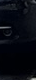

In [54]:
import sktl_class as sk


person1AsktlData = {"image": "../../images/IMG_6544/IMG_6544.JPEG", "skeltal_data": {"body_parts":  imgAdf.iloc[23, 5:].to_dict()}}
person1Asktl = sk.Skeleton(person1AsktlData)

person1Asktl.get_upper_cloth()

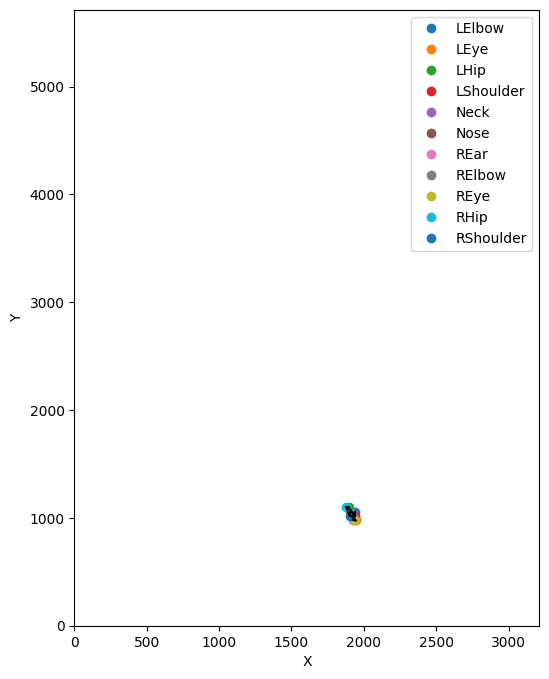

In [59]:
display_skeleton((imgAdf.iloc[23, 6:].to_dict()))

In [47]:
person1CsktlData = {"image": "../../images/IMG_6533/masks_IMG_6533/person_1.png", "skeltal_data": {"body_parts":  imgCdf.iloc[14, 5:].to_dict()}}
person1Csktl = sk.Skeleton(person1CsktlData)

person1Csktl.get_upper_cloth()

No Neck found


In [46]:
person2CsktlData = {"image": "../../images/IMG_6533/masks_IMG_6533/person_1.png", "skeltal_data": {"body_parts":  imgCdf.iloc[14, 5:].to_dict()}}
person2Csktl = sk.Skeleton(person2CsktlData)

person2Csktl.get_upper_cloth()

No Neck found
